In [ ]:
# С помощью модели KMeans заквантуем цвета в изображении котика
# и визуально продемонстрируем схожесть изображений из 123051 цветов и 100 цветов

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [88]:
image_as_array = mpimg.imread(r"C:\Users\chist\Desktop\кот подопытный.jpg")

In [80]:
# массив выглядит следующим образом
image_as_array

array([[[ 16,  14,  19],
        [ 68,  66,  71],
        [ 34,  31,  38],
        ...,
        [ 31,  70, 109],
        [ 55,  94, 135],
        [ 43,  85, 125]],

       [[ 16,  14,  19],
        [ 16,  14,  19],
        [ 13,  10,  17],
        ...,
        [ 38,  76, 115],
        [ 74, 113, 154],
        [ 48,  90, 130]],

       [[ 21,  16,  23],
        [ 10,   5,  12],
        [ 13,   8,  15],
        ...,
        [ 44,  82, 121],
        [ 45,  82, 124],
        [ 45,  84, 125]],

       ...,

       [[ 56,  42, 140],
        [ 39,  25, 122],
        [ 37,  23, 120],
        ...,
        [ 56, 114, 198],
        [ 61, 121, 193],
        [ 78, 139, 204]],

       [[ 57,  41, 139],
        [ 40,  24, 122],
        [ 32,  17, 112],
        ...,
        [ 60, 116, 201],
        [ 56, 116, 188],
        [ 63, 124, 187]],

       [[ 41,  25, 123],
        [ 47,  31, 129],
        [ 45,  30, 125],
        ...,
        [ 66, 122, 207],
        [ 59, 119, 191],
        [ 61, 122, 185]]

In [87]:
# другими словами, изображение состоит из 403х604 пикселя, каждый из которых закодирован 3 цветами RGB кода
image_as_array.shape

(403, 604, 3)

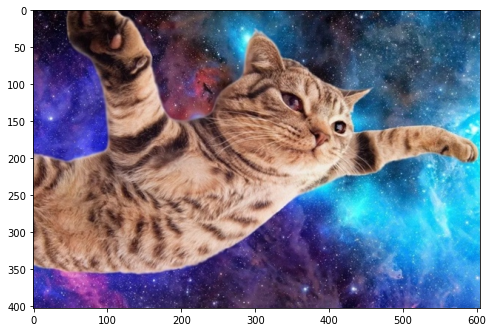

In [81]:
# выводим изначальное изображение на экран
plt.figure(figsize=(8,8))
plt.imshow(image_as_array)

In [84]:
# решейпим 3D (H,W,C) -> 2D (H*W, C) преследуя 2 цели:
# 1) подготовить дату для кластеризации в модели KMeans
# 2) вернуть количество цветов в изначальном изображении

(h,w,c) = image_as_array.shape
image_as_array2D = image_as_array.reshape(h*w, c)
len(pd.DataFrame(image_as_array2D).drop_duplicates())

# вернем количество цветов в изначальном изображении

123051

In [58]:
from sklearn.cluster import KMeans

# заквантуем изначальные цвета до 100 кластеров
# т.е. 100 центрированных цветов, в которые объединятся близкие по оттенку цвета

model = KMeans(n_clusters=100)
labels = model.fit_predict(image_as_array2D)

In [60]:
# вернем ценроиды (тут - значения цветов для центроид)
# плюс округляем и переводим в int

rgb_codes = model.cluster_centers_.round(0).astype(int)

In [61]:
# меняем значения цветов в массиве на значения цветов центроид
# и решейпим обратно в нормальный массив для изображения

quantized_img = np.reshape(rgb_codes[labels], (h,w,c))

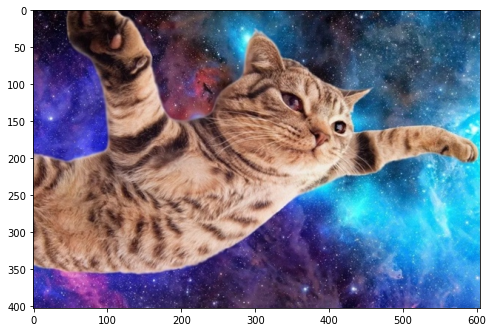

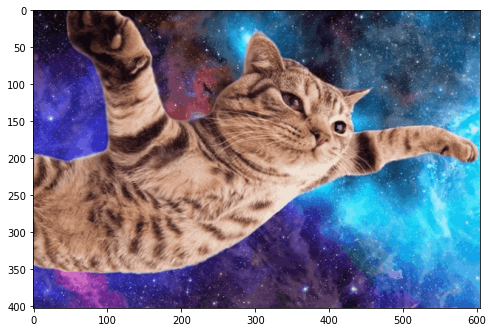

In [89]:
# выведем два изображения:
# 1) изначальный кот с 123051 цветами
# 2) заквантованный кот со 100 цветами

plt.figure(figsize=(8,8))
plt.imshow(image_as_array)
plt.figure(figsize=(8,8))
plt.imshow(quantized_img)